In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Training_DU_Clustering70.csv", skipinitialspace=True, sep=',')
df

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,TransmissionID,NationalityID
0,2001,8,1.0,55117,3192.0,3947.0,3192.0,3947.0,4315.0,1054,0,0
1,2006,3,1.0,72728,12423.0,13917.0,13721.0,15319.0,10835.0,920,0,0
2,2006,3,1.0,80650,13271.0,14833.0,12982.0,18542.0,11515.0,983,0,0
3,2002,8,1.0,87788,5286.0,8768.0,5503.0,8901.0,9110.0,1283,0,0
4,2002,7,1.0,58350,5617.0,6566.0,5617.0,6566.0,6455.0,1054,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2006,4,1.0,73564,10289.0,14907.0,9284.0,13919.0,8315.0,1272,0,0
35673,2006,4,1.0,80855,10120.0,14618.0,10795.0,14669.0,10115.0,1373,0,0
35674,2006,4,1.0,82286,12341.0,16405.0,13115.0,16693.0,8675.0,1373,0,0
35675,2006,3,1.0,68976,13765.0,15366.0,13981.0,15599.0,9215.0,1118,0,0


In [3]:
Final_df = pd.read_csv("Training_DU_Clustering_forAnalysis70.csv", skipinitialspace=True, sep=',')
Final_df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,MMRCurrentRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TransmissionID,NationalityID
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,3947.0,23359,91752,CA,4315.0,0,1054,4D,0,0
1,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,15319.0,19662,78219,TX,10835.0,0,920,NaN,0,0
2,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,18542.0,19619,34761,FL,11515.0,0,983,NaN,0,0
3,2010-12-08,1500 RAM,QUAD CAB,2002,23228,1,MANHEIM,8,DODGE,4.7L,...,8901.0,18880,29532,SC,9110.0,0,1283,NaN,0,0
4,2009-07-31,1500 RAM,QUAD CAB,2002,60207,1,ADESA,7,DODGE,5.9L,...,6566.0,18881,37771,TN,6455.0,0,1054,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2010-10-11,ZEPHYR,SEDAN,2006,64639,0,ADESA,4,LINCOLN,NaN,...,13919.0,21053,85226,AZ,8315.0,0,1272,4D,0,0
35673,2010-11-23,ZEPHYR,SEDAN,2006,9964,0,MANHEIM,4,LINCOLN,NaN,...,14669.0,52646,21075,MD,10115.0,0,1373,4D,0,0
35674,2010-02-18,ZEPHYR,SEDAN,2006,25215,0,OTHER,4,LINCOLN,NaN,...,16693.0,3453,80229,CO,8675.0,0,1373,4D,0,0
35675,2009-03-03,ZEPHYR,SEDAN,2006,32556,0,MANHEIM,3,LINCOLN,NaN,...,15599.0,3453,80022,CO,9215.0,0,1118,4D,0,0


# Inizio Analisi 

In [4]:
columns=['VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','VehBCost', 'WarrantyCost']
pdf=df[columns]
pdf.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
0,8,55117,3192.0,4315.0,1054
1,3,72728,12423.0,10835.0,920
2,3,80650,13271.0,11515.0,983
3,8,87788,5286.0,9110.0,1283
4,7,58350,5617.0,6455.0,1054


## Normalization

In [5]:
scaler = StandardScaler()
scaler.fit(pdf.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X = scaler.fit_transform(pdf.values)

In [7]:
X[:5]

array([[ 2.19866922, -1.09637652, -1.22225759, -1.32029031, -0.34928202],
       [-0.67442972,  0.10734225,  2.59425786,  2.32867295, -0.56738066],
       [-0.67442972,  0.64881407,  2.94485965,  2.70923967, -0.46484175],
       [ 2.19866922,  1.13669917, -0.35650271,  1.36326472,  0.0234388 ],
       [ 1.62404944, -0.8753997 , -0.21965224, -0.12262446, -0.34928202]])

Knee Method to estimate the best K

In [8]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=150)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

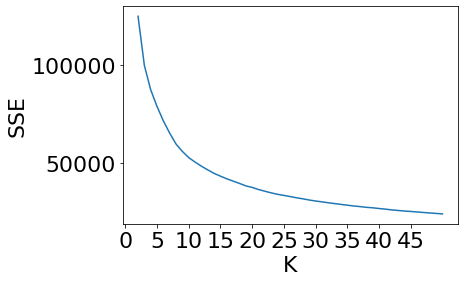

In [9]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Prima analisi K=10

In [10]:
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_[:5]

array([8, 7, 7, 4, 8])

In [12]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4933, 3793, 4659, 3236, 3294, 5061, 4318, 3221, 2819,  343],
       dtype=int64))

In [13]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4933,
 1: 3793,
 2: 4659,
 3: 3236,
 4: 3294,
 5: 5061,
 6: 4318,
 7: 3221,
 8: 2819,
 9: 343}

Two dimention view

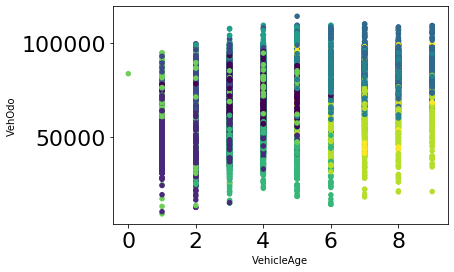

In [14]:
plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

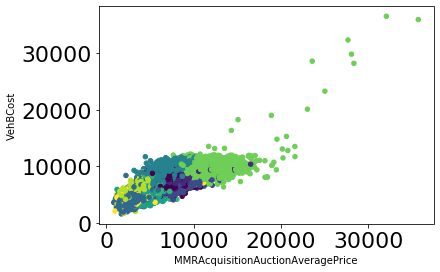

In [15]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

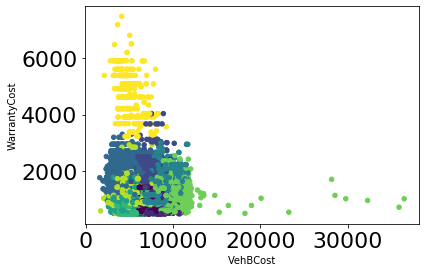

In [16]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [17]:
kmeans.cluster_centers_

array([[-0.32492952,  0.03658674,  0.33318833,  0.30570236, -0.51045352],
       [-1.29495243, -1.44637151,  0.67552349,  0.50126218, -0.70194724],
       [-0.58174115,  0.51316484,  0.54038227,  0.32719051,  0.98712954],
       [ 1.48003935,  0.94847197, -1.20008524, -1.13603355,  1.03440083],
       [ 0.93911382,  0.6260314 ,  0.25602912,  1.02523992,  0.27149926],
       [ 0.15297735,  0.67110491, -0.76395995, -0.94109204, -0.32792634],
       [-0.28255873, -1.19091713, -0.53380096, -0.55277822, -0.74905822],
       [-0.66158506,  0.29451582,  1.86067012,  1.55352669, -0.10854197],
       [ 1.26343581, -0.54616848, -1.12760905, -0.78149864, -0.1092765 ],
       [ 1.03937799,  0.34262583, -0.95480175, -0.83317666,  5.50059887]])

Two dimentional view with the centroids

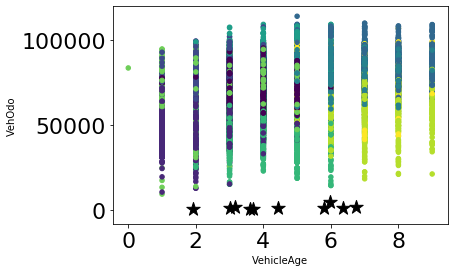

In [18]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

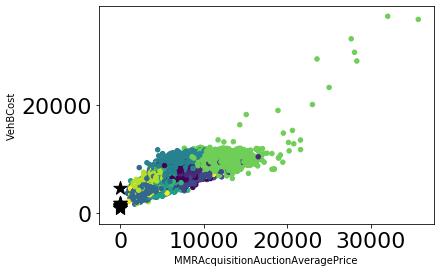

In [19]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

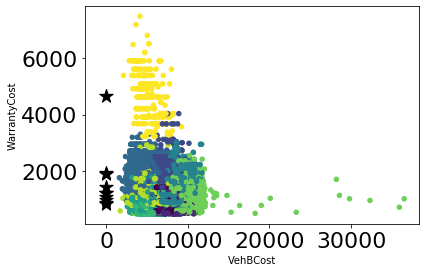

In [20]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

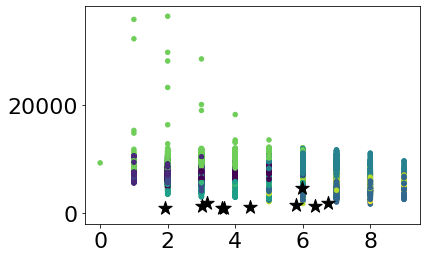

In [21]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

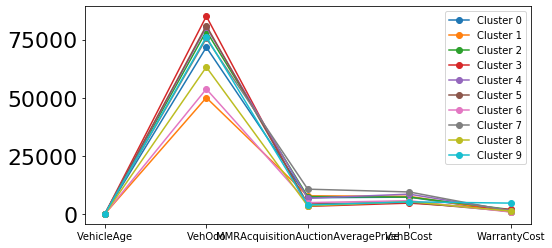

In [22]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [23]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 52604.260285689656
Silhouette 0.22225065513894865


## Seconda analisi K=7, BEST Combination

In [24]:
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 6436, 1: 7900, 2: 354, 3: 5728, 4: 5074, 5: 3879, 6: 6306}

Two dimention view

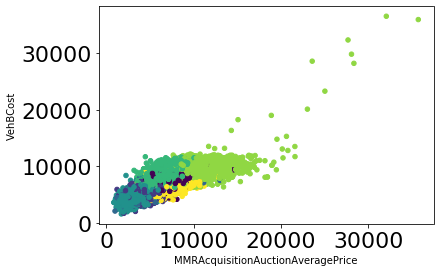

In [26]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

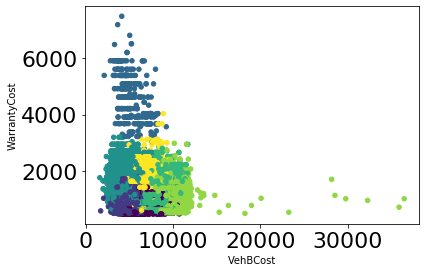

In [27]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [28]:
kmeans.cluster_centers_

array([[-0.9858383 , -1.318444  ,  0.36491298,  0.23829713, -0.70510085],
       [ 0.13176846, -0.3044866 , -0.75957577, -0.77595917, -0.57022459],
       [ 1.01858847,  0.34817756, -0.89701964, -0.80195945,  5.44655287],
       [ 1.30211785,  0.74814981, -1.15755828, -1.08711842,  0.61972576],
       [ 0.70705958,  0.45350987,  0.18712401,  0.79970519, -0.06521929],
       [-0.63167351,  0.2568471 ,  1.75291308,  1.47472794, -0.13881726],
       [-0.57838612,  0.5062767 ,  0.45110061,  0.21000543,  0.70464338]])

Two dimentional view with the centroids

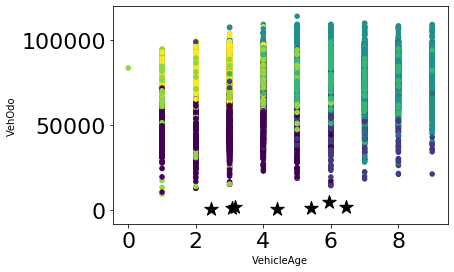

In [29]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

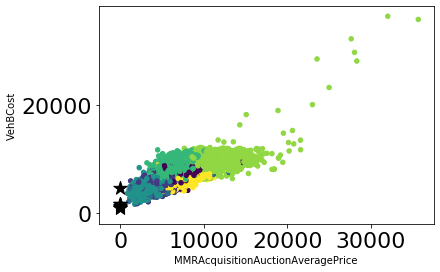

In [30]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

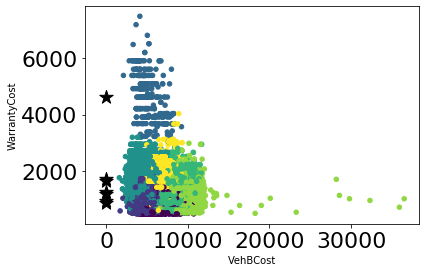

In [31]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

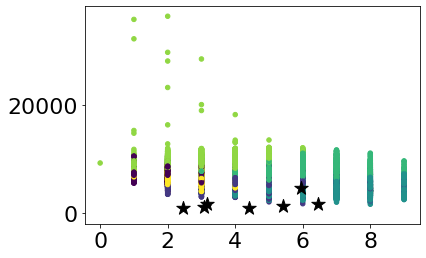

In [32]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

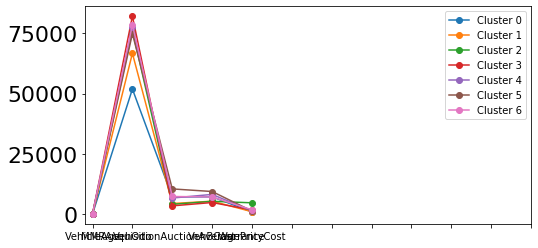

In [33]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [34]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 65084.88529257539
Silhouette 0.23336593242199172


## Terza analisi K=6

In [35]:
kmeans = KMeans(n_clusters=6, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 6113, 1: 9545, 2: 6511, 3: 355, 4: 8380, 5: 4773}

Two dimention view

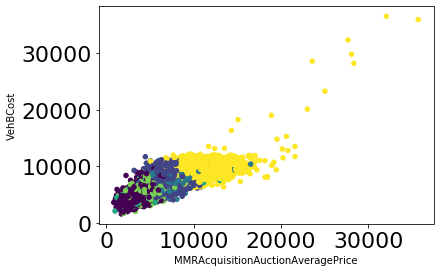

In [37]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

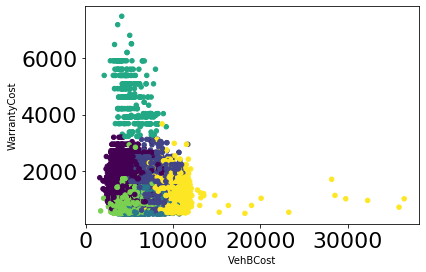

In [38]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [39]:
kmeans.cluster_centers_

array([[ 1.30428312,  0.74844102, -1.12593325, -1.02948366,  0.57676666],
       [-0.07370725,  0.53407322,  0.31842562,  0.40576697,  0.44835412],
       [-0.98536199, -1.29968524,  0.38682748,  0.26717953, -0.69140357],
       [ 1.00734482,  0.35171994, -0.88360496, -0.79603364,  5.4464109 ],
       [ 0.16036419, -0.32942614, -0.72308699, -0.70327344, -0.57917557],
       [-0.53396176,  0.2965931 ,  1.60891771,  1.4326828 , -0.08170435]])

Two dimentional view with the centroids

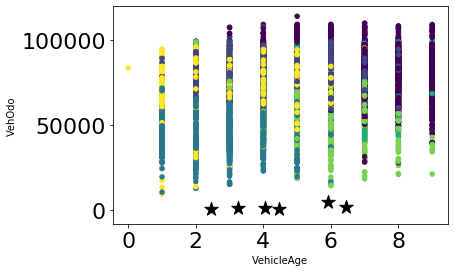

In [40]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

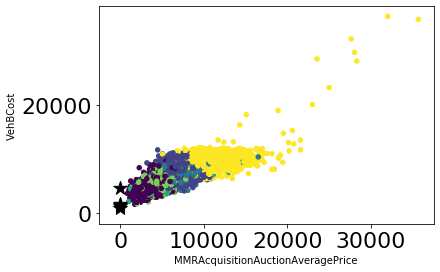

In [41]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

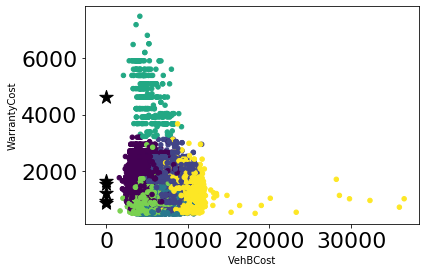

In [42]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

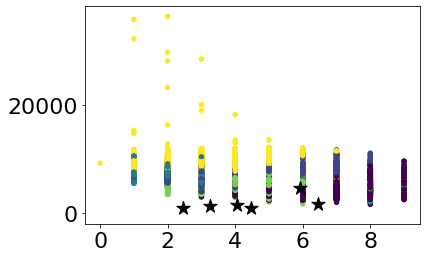

In [43]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

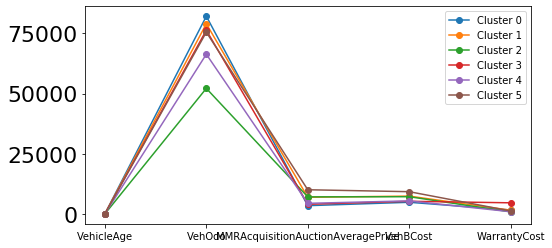

In [44]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [45]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 71344.99140182721
Silhouette 0.22362984662036503


## Quarta analisi K=5 

In [46]:
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4762, 1: 9259, 2: 7409, 3: 9543, 4: 4704}

Two dimention view

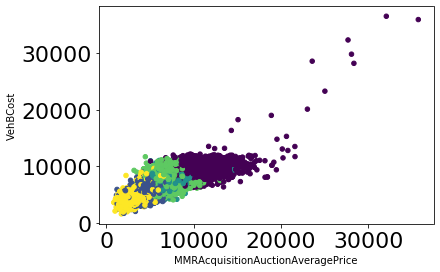

In [48]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

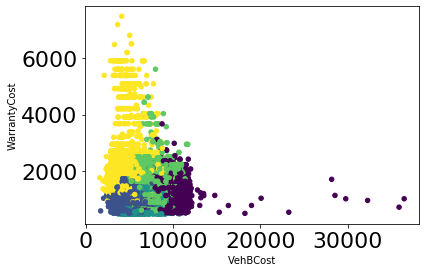

In [49]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [50]:
kmeans.cluster_centers_

array([[-0.58218145,  0.23686204,  1.61839954,  1.42162309, -0.12260794],
       [ 0.34926111, -0.02356434, -0.80650789, -0.78175527, -0.48018223],
       [-0.87829954, -1.28210175,  0.24998516,  0.15135667, -0.70464197],
       [-0.07158151,  0.53069829,  0.34794971,  0.44271235,  0.47212619],
       [ 1.43096154,  0.74962851, -1.15031324, -1.03686942,  1.22150292]])

Two dimentional view with the centroids

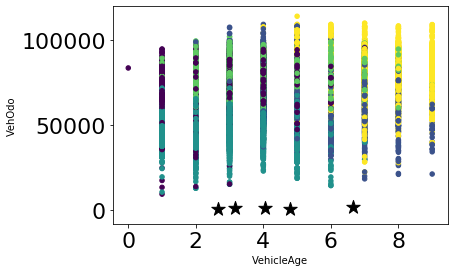

In [51]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

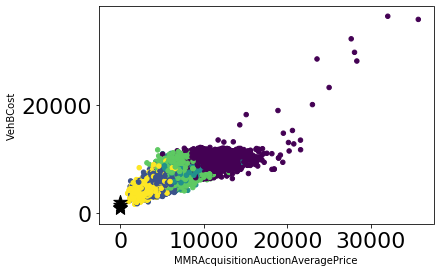

In [52]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

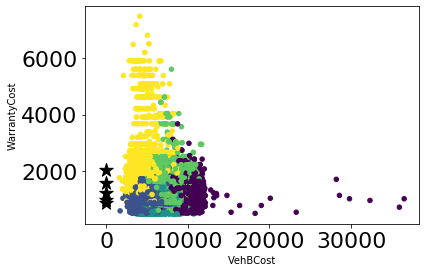

In [53]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

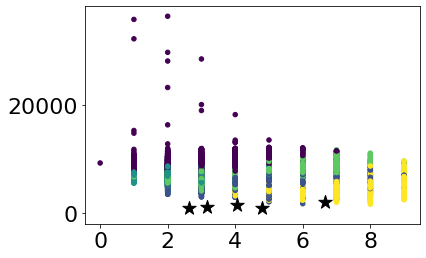

In [54]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

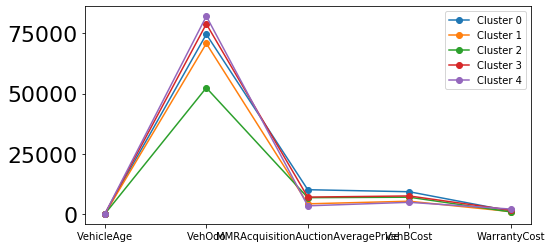

In [55]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [56]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 78735.64168867547
Silhouette 0.22008516184624996


## Quinta analisi K=4

In [57]:
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 7486, 1: 11900, 2: 5445, 3: 10846}

Two dimention view

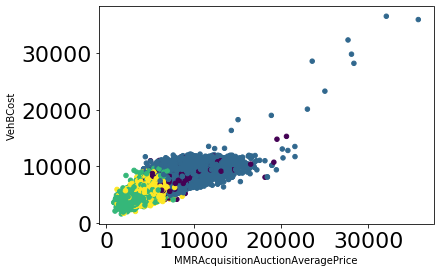

In [59]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

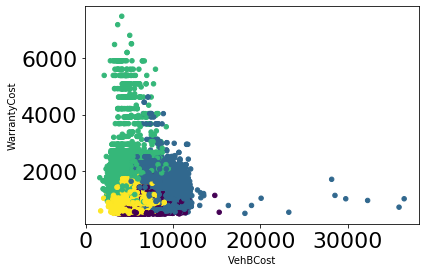

In [60]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [61]:
kmeans.cluster_centers_

array([[-0.89801659, -1.29208612,  0.31672313,  0.21792284, -0.70431568],
       [-0.31558828,  0.4528227 ,  0.91650737,  0.88335983,  0.29819627],
       [ 1.35623161,  0.74270643, -1.06328419, -0.92308308,  1.16375446],
       [ 0.28574005,  0.02316068, -0.68982673, -0.65559817, -0.42386594]])

Two dimentional view with the centroids

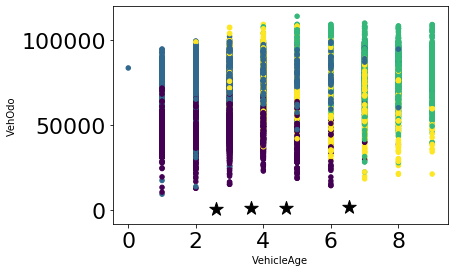

In [62]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

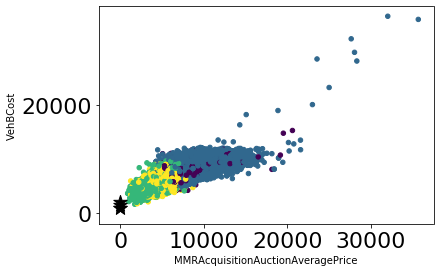

In [63]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

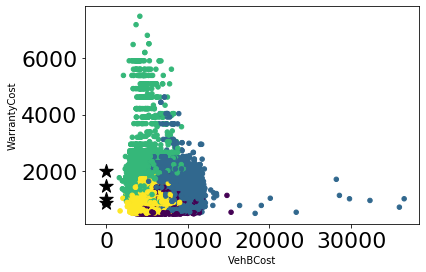

In [64]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

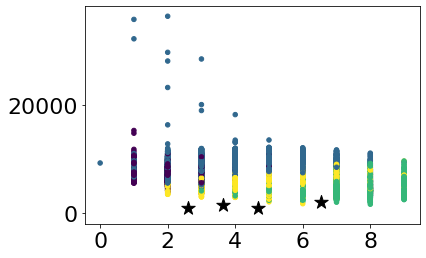

In [65]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

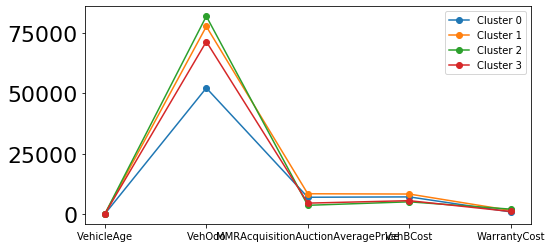

In [66]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [67]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 87240.92851065283
Silhouette 0.23132360727333717


## Sesta analisi K=3, BEST Silhouette

In [68]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 12591, 1: 12191, 2: 10895}

Two dimention view

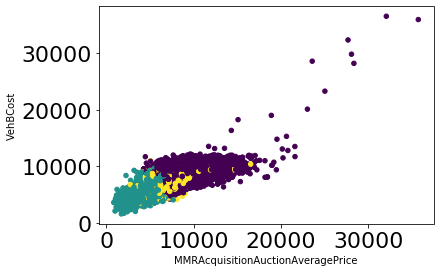

In [70]:
plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

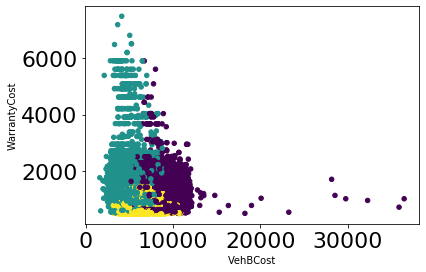

In [71]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [72]:
kmeans.cluster_centers_

array([[-0.32114394,  0.42057493,  0.90510701,  0.87474847,  0.2557692 ],
       [ 0.87840457,  0.49744129, -0.92840121, -0.84061251,  0.35570858],
       [-0.61348199, -1.04476072, -0.00640053, -0.06972314, -0.69502473]])

Two dimentional view with the centroids

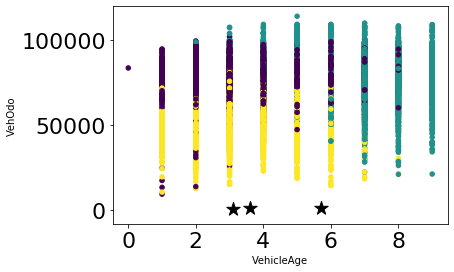

In [73]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

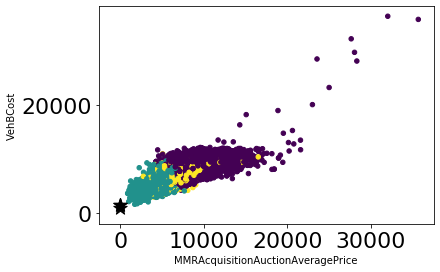

In [74]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['MMRAcquisitionAuctionAveragePrice'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

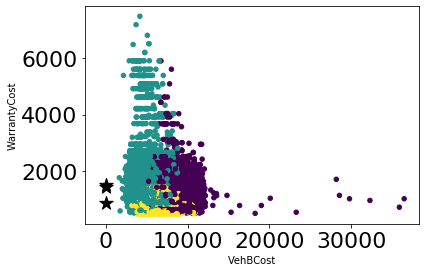

In [75]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

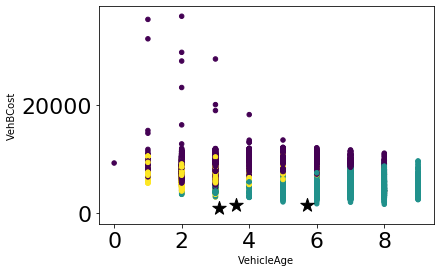

In [76]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehBCost')
plt.show()

Visualization of clusters centers by means of parallel coordinates

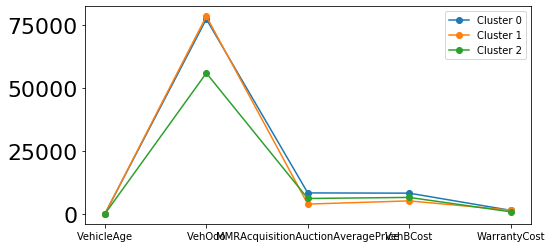

In [77]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [78]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 99680.31528461559
Silhouette 0.25650747599947515


## Comparison of the results of the different K

### K=10     
SSE 52'604.46179357765

Silhouette 0.22204063263172466

### K=7       BEST Combination
SSE 65'084.309301063724

Silhouette 0.23322824325042302

### K=6 
SSE 71'344.06076370695

Silhouette 0.22406204096047827

### K=5 
SSE 78'735.18004611412

Silhouette 0.22022064991791823

### K=4
SSE 87'240.83786715593

Silhouette 0.2313186520187773

### K=3        BEST Silhouette
SSE 99'680.26236965792

Silhouette 0.256504079637677

### Other fast tests with other values of K

In [79]:
kmeans = KMeans(n_clusters=15, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=15, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 43108.533676546394
Silhouette 0.20670980855694032


 BEST Sum of Squared Error

In [81]:
kmeans = KMeans(n_clusters=12, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 48245.92434047186
Silhouette 0.2178288834280197


In [83]:
kmeans = KMeans(n_clusters=8, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=8, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 59518.05300303548
Silhouette 0.22566522797006444


Better K=10



In [85]:
kmeans = KMeans(n_clusters=9, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=9, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 55760.998483651325
Silhouette 0.22096863533617367


Better K=10